# studying the distribution of returns of NIFTY indices

In [1]:
library(tidyverse)
library(ggthemes)
library(odbc)
library(plutoR)
library(quantmod)
library(PerformanceAnalytics)

options("scipen"=999)
options(stringsAsFactors = FALSE)
options(repr.plot.width=16, repr.plot.height=8)

source("config.R")
source("goofy/plot.common.R")
source("goofy/misc.common.R")

indices <- Indices()
indexName <- "NIFTY 50 TR"

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.1
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘xts’

The following objects are masked from ‘package:dplyr’:

    first, last

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.

Attaching package: ‘PerformanceAnalytics’

The following object is masked from ‘package:graphics’:

    legend

Registering fonts with R

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine


Attaching package

In [2]:
trIndex <- data.frame(indices$NseTimeSeries() %>%
    filter(NAME == indexName) %>%
    select(TIME_STAMP, CLOSE))

trXts <- xts(trIndex$CLOSE, as.Date(trIndex$TIME_STAMP))
monthlyTrReturns <- monthlyReturn(trXts)

#ignore the first and last months
monthlyTrReturns <- monthlyTrReturns[-1]
monthlyTrReturns <- monthlyTrReturns[-nrow(monthlyTrReturns)]

monthlyTrReturns <- monthlyTrReturns * 100

In [3]:
# statistical summary of returns
print(summary(monthlyTrReturns))

     Index            monthly.returns  
 Min.   :1999-07-30   Min.   :-26.369  
 1st Qu.:2004-07-15   1st Qu.: -2.436  
 Median :2009-06-30   Median :  1.420  
 Mean   :2009-06-30   Mean   :  1.303  
 3rd Qu.:2014-06-14   3rd Qu.:  5.621  
 Max.   :2019-05-31   Max.   : 28.084  


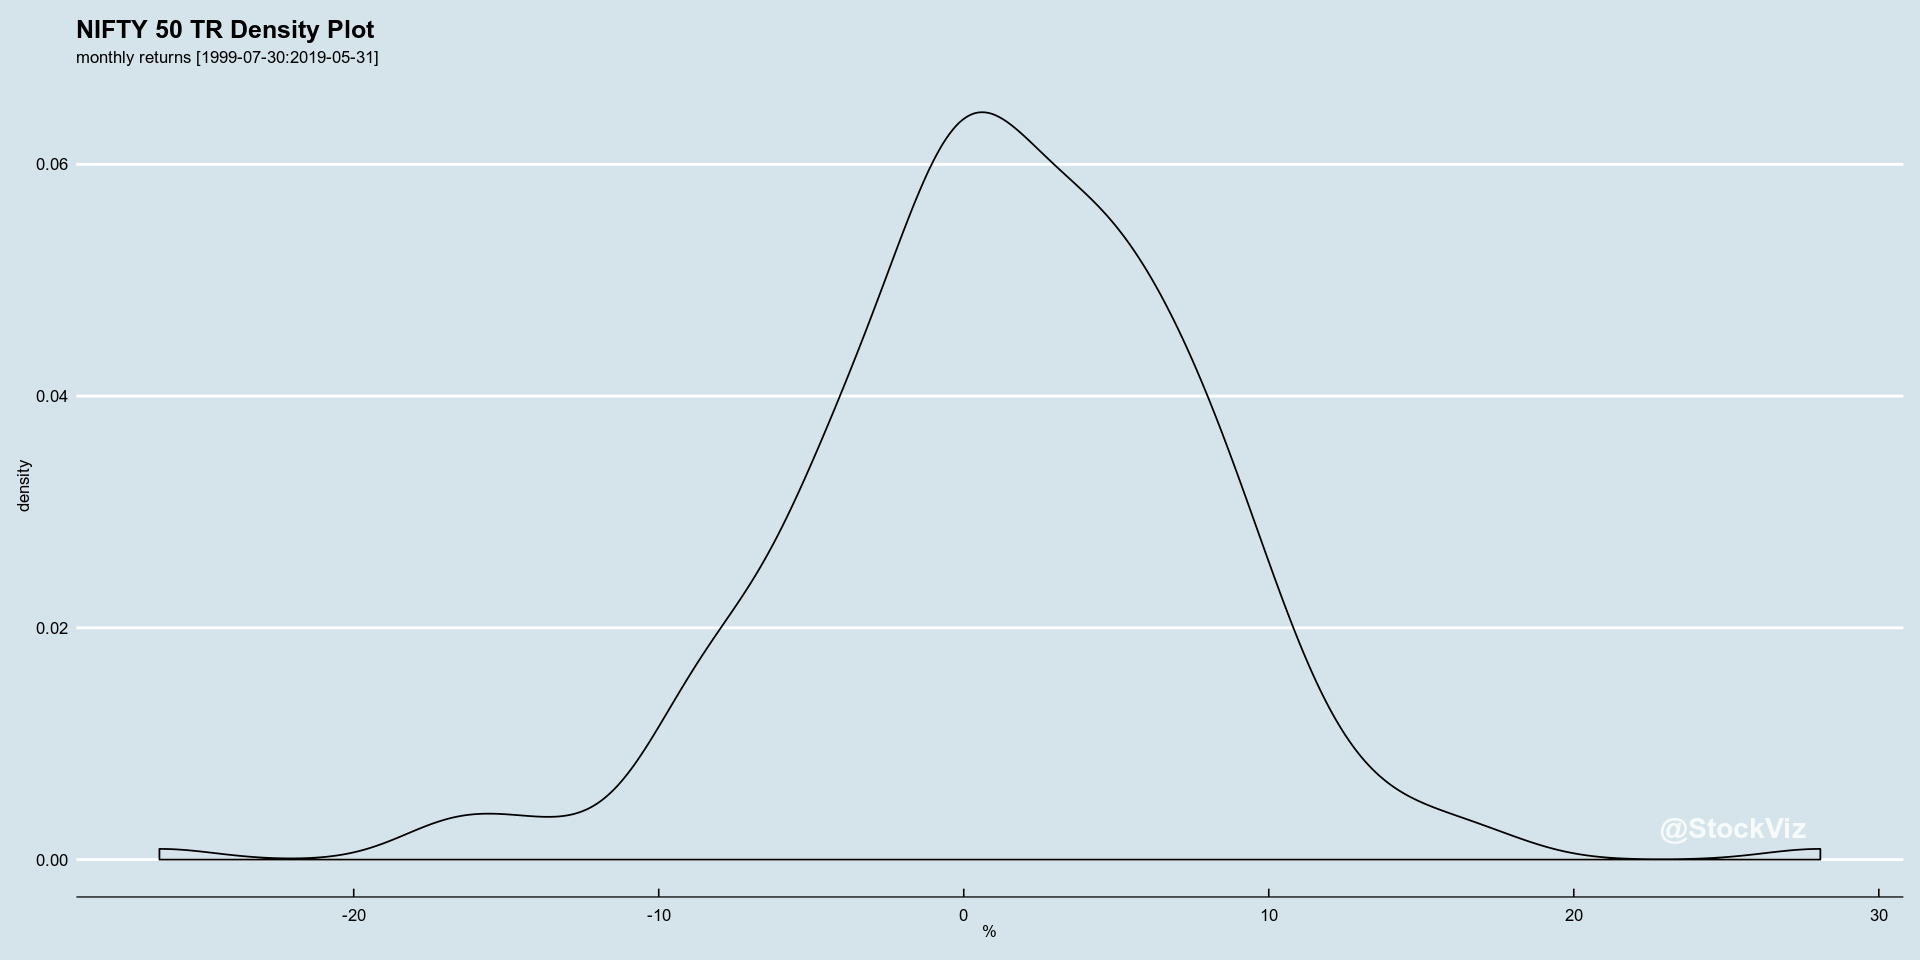

In [4]:
firstDate <- first(index(monthlyTrReturns))
lastDate <- last(index(monthlyTrReturns))
xAxisTicks <- seq(from=firstDate, to=lastDate, length.out=10)

mRetDf <- data.frame(monthlyTrReturns)
names(mRetDf) <- c('R')

mRetDf$T <- index(monthlyTrReturns)

ggplot(mRetDf, aes(x=R)) +
    theme_economist() +
    geom_density() +
    labs(x='%', y='density', color='', title=sprintf("%s Density Plot", indexName), 
         subtitle=sprintf("monthly returns [%s:%s]", firstDate, lastDate)) +
    annotate("text", x=max(monthlyTrReturns), y=0, label = "@StockViz", hjust=1.1, vjust=-1.1, col="white", cex=6, fontface = "bold", alpha = 0.8)

### super-impose a normal distribution with the same mean and standard-deviation

what are these "fat-tails" that people keep talking about?

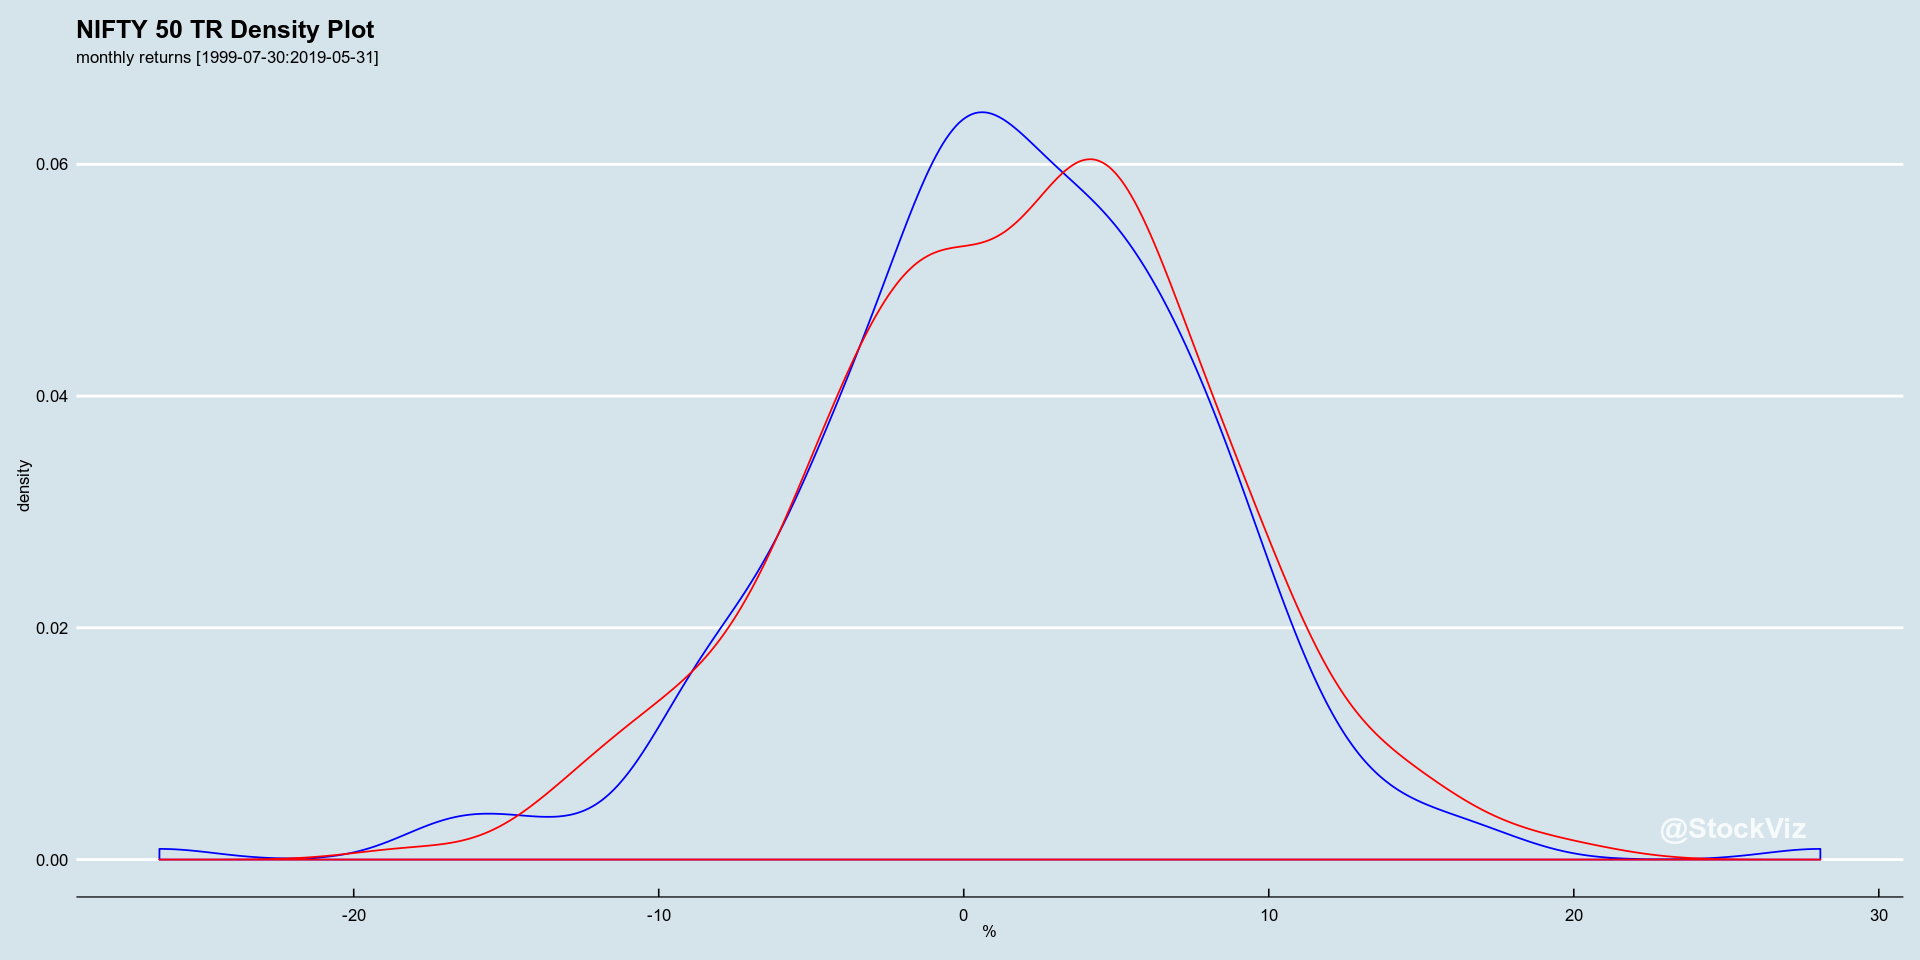

In [5]:
avg <- mean(coredata(monthlyTrReturns))
stddev <- sd(coredata(monthlyTrReturns))

mRetDf$N <- rnorm(nrow(monthlyTrReturns), mean=avg, sd=stddev)

ggplot(mRetDf) +
    theme_economist() +
    geom_density(aes(x = R), color='blue') +
    geom_density(aes(x = N), color='red') +
    labs(x='%', y='density', color='', title=sprintf("%s Density Plot", indexName), 
         subtitle=sprintf("monthly returns [%s:%s]", firstDate, lastDate)) +
    annotate("text", x=max(monthlyTrReturns), y=0, label = "@StockViz", hjust=1.1, vjust=-1.1, col="white", cex=6, fontface = "bold", alpha = 0.8)


This notebook was created using [pluto](http://pluto.studio). Learn more [here](https://github.com/shyams80/pluto)